# Introduction to convnets

This notebook contains a few notes on chapter 5 Deep learning for computer vision.



- [x] complementar este notebook con explicacion de la convolucion segun nielsen

In [2]:
## imports
from __future__ import print_function
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import rcParams


def load_rcparams(figsize=None, for_paper=False):
    """
    Load a custom rcParams dictionary
    """
    
    rcParams['axes.titlesize']  = 14            # title
    rcParams['axes.labelsize']  = 12            # $f_i$ labels
    rcParams['xtick.color']     = "#474747"     # ticks gray color
    rcParams['ytick.color']     = "#474747"     # ticks gray color
    rcParams['xtick.labelsize'] = 10            # ticks size
    rcParams['ytick.labelsize'] = 10            # ticks size
    rcParams['legend.fontsize'] = 12            # legend
    rcParams['legend.fontsize'] = 12            # legend

    if for_paper:    
        rcParams['font.family'] = 'serif'       # font face
                
    if isinstance(figsize, tuple):
        rcParams['figure.figsize'] = figsize    # figsize, common values: (12, 5), (8, 6)
    
    #print("(load_rcparams) figsize: (%d, %d), you can use (12, 5), (8, 6)" % (rcParams['figure.figsize'][0], rcParams['figure.figsize'][1]))



def print_matrix(vector):
    
    for row in vector:
        print(" ".join(["%.4f" % val for val in row]))
        
def print_int_matrix(vector):
    
    for row in vector:
        print(" ".join(["%3d" % val for val in row]))

# 1. First convolution neural network

In [5]:
from keras import layers
from keras import models

model = models.Sequential(name="first_cnn")

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))




Let's display the architecture of this network:

In [6]:
model.summary()

Model: "first_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36

**Más adelante debemos explicar/entender por qué el output shape de cada capa es ese**

Now, let's train the convnet ont the MNIST dataset.



# 2. Training

In [7]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
# data preprocessing
x_train_images = train_images.reshape((60000, 28, 28, 1))       # unlike chap 2, where the shape was (28*28, ),
x_train_images = x_train_images.astype("float32") / 255         # here, the shape is (28, 28, 1), that is, (height, witdth, channels)


x_test_images  = test_images.reshape((10000, 28, 28, 1))
x_test_images  = x_test_images.astype("float32") / 255

In [9]:
# prepare labels using one-hot encoding
y_train_labels = to_categorical(train_labels)
y_test_labels  = to_categorical(test_labels)

In [11]:
# compile network
model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"],
             )

In [12]:
# training
history = model.fit(x_train_images, y_train_labels, epochs=5, batch_size=64)  # unlike chap 2, where batch_size=128, here batch_size=64

W0907 06:45:24.043386 140702589675264 deprecation.py:323] From /home/auraham/.virtualenvs/keras/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0907 06:45:24.147699 140702589675264 deprecation_wrapper.py:119] From /home/auraham/.virtualenvs/keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 28s 471us/step - loss: 0.1733 - acc: 0.9460
Epoch 2/5
60000/60000 [==============================] - 28s 460us/step - loss: 0.0465 - acc: 0.9856
Epoch 3/5
60000/60000 [==============================] - 28s 461us/step - loss: 0.0334 - acc: 0.9898
Epoch 4/5
60000/60000 [==============================] - 28s 463us/step - loss: 0.0254 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 28s 466us/step - loss: 0.0185 - acc: 0.9943


In [13]:
# evaluate model
test_loss, test_acc = model.evaluate(x_test_images, y_test_labels)

10000/10000 [==============================] - 1s 136us/step


In [16]:
# compare training and testing accuracy
hist_dict = history.history

# the lower the better
print("train loss: %.4f" % (hist_dict["loss"][-1])) # loss in the last epoch
print("test loss:  %.4f" % test_loss)
print("")

# the higher the better
print("train acc:  %.4f" % (hist_dict["acc"][-1])) # accuracy in the last epoch
print("test acc:   %.4f" % test_acc)

train loss: 0.0185
test loss:  0.0302

train acc:  0.9943
test acc:   0.9914


In [17]:
# plot training loss and accuracy

%matplotlib inline

load_rcparams((10, 8))

fig = plt.figure()
axes = (fig.add_subplot(211), fig.add_subplot(212))


hist_dict = history.history
indicators = ("acc", "loss")
colors = ["#454545", "#007ca5", "#A91458"]


for i, ax, indicator in zip((0, 1), axes, indicators):
    
    ax.cla()
    
    y = hist_dict[indicator]
    x = np.arange(1, len(y)+1)
    
    ax.set_title(indicator)
    ax.set_xlabel("Epochs")
    ax.plot(x, y, marker="o", c=colors[i])
    
# adjust margins
fig.subplots_adjust(
                    hspace=0.4,
                    )
    
plt.show()

# 3. Train and validation
Now, let's train the model again, but using a training and validation sets.

In [18]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:
# data preprocessing
x_train_images = train_images.reshape((60000, 28, 28, 1))       # unlike chap 2, where the shape was (28*28, ),
x_train_images = x_train_images.astype("float32") / 255         # here, the shape is (28, 28, 1), that is, (height, witdth, channels)

x_test_images  = test_images.reshape((10000, 28, 28, 1))
x_test_images  = x_test_images.astype("float32") / 255

In [20]:
# prepare labels using one-hot encoding
y_train_labels = to_categorical(train_labels)
y_test_labels  = to_categorical(test_labels)

In [30]:
# create training and valitation sets
X = x_train_images.copy()
Y = y_train_labels.copy()

# the first 6000 images are used for validation (10% of 60,000)
x_val_images = X[:6000]
y_val_labels = Y[:6000]

# the remaining images are used for training
x_train_images = X[6000:]
y_train_labels = Y[6000:]

In [31]:
# train and validate the model
history_with_val = model.fit(x_train_images, y_train_labels, epochs=5, batch_size=64, 
                             validation_data=(x_val_images, y_val_labels)   # here, we add a validation set
                            )


Train on 53000 samples, validate on 6000 samples
Epoch 1/5
53000/53000 [==============================] - 25s 470us/step - loss: 0.0073 - acc: 0.9981 - val_loss: 0.0012 - val_acc: 0.9997
Epoch 2/5
53000/53000 [==============================] - 25s 472us/step - loss: 0.0069 - acc: 0.9981 - val_loss: 0.0031 - val_acc: 0.9987
Epoch 3/5
53000/53000 [==============================] - 25s 469us/step - loss: 0.0069 - acc: 0.9983 - val_loss: 0.0076 - val_acc: 0.9980
Epoch 4/5
53000/53000 [==============================] - 25s 472us/step - loss: 0.0063 - acc: 0.9984 - val_loss: 0.0076 - val_acc: 0.9973
Epoch 5/5
53000/53000 [==============================] - 25s 475us/step - loss: 0.0051 - acc: 0.9987 - val_loss: 0.0222 - val_acc: 0.9950


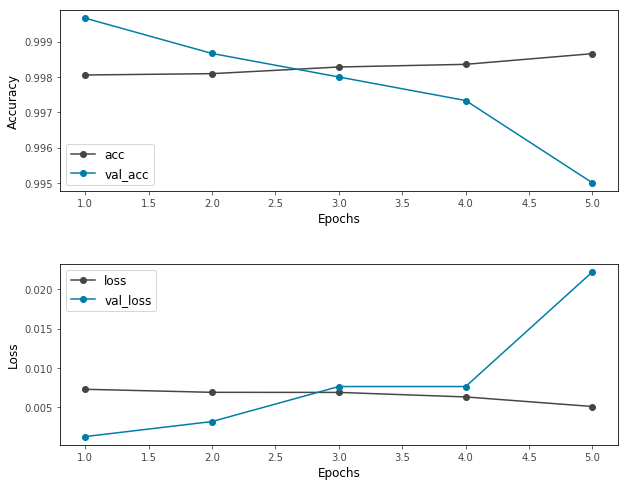

In [32]:
# plot training loss and accuracy

%matplotlib inline

load_rcparams((10, 8))

fig = plt.figure()
axes = (fig.add_subplot(211), fig.add_subplot(212))


hist_dict = history_with_val.history
indicators = ("acc", "loss", "val_acc", "val_")
colors = ["#454545", "#007ca5", "#A91458"]

# --- plot accuracy ---
ax = axes[0]
ax.cla()
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epochs")
for i, indicator in enumerate(("acc", "val_acc")):
    
    y = hist_dict[indicator]
    x = np.arange(1, len(y) + 1)
    
    ax.plot(x, y, marker="o", c=colors[i], label=indicator)

ax.legend(loc="lower left")


# --- plot loss ---
ax = axes[1]
ax.cla()
ax.set_ylabel("Loss")
ax.set_xlabel("Epochs")
for i, indicator in enumerate(("loss", "val_loss")):
    
    y = hist_dict[indicator]
    x = np.arange(1, len(y) + 1)
    
    ax.plot(x, y, marker="o", c=colors[i], label=indicator)

ax.legend(loc="upper left")

    
# adjust margins
fig.subplots_adjust(
                    hspace=0.4,
                    )
    
plt.show()